In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import math
import matplotlib.pyplot as plt
#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import unicodedata
import unidecode
import re
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

#preprocessing 
from sklearn import preprocessing
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from langdetect import detect


In [6]:
train = pd.read_csv('/Users/rahulsharma/Teams/c3cc8568-0-dataset/train.csv')
test = pd.read_csv('/Users/rahulsharma/Teams/c3cc8568-0-dataset/test.csv')
df = train.copy()
df_test = test.copy()

In [3]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=True):
    text = re.sub(pattern, '', text)
    return text

remove_digits = True
pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'

In [10]:
for i in range(0,len(df)):
    text = df['Consumer-complaint-summary'][i]
    uni_string = unicode(text,"utf-8")
    remove_acc_string = remove_accented_chars(uni_string)
    remove_spe_string = remove_special_characters(remove_acc_string)
    df['Consumer-complaint-summary'][i] = remove_spe_string
    

In [12]:
df['Consumer-complaint-summary'][2]

u'El XXXX  XXXX   estaba preparando el vuelo de regreso a XXXX vea XXXX para el funeral de un familiar cercano y me aloje en un hotel en el aeropuerto XXXX Antes de irme contrate a una cuidadora de perros y su amiga que me habian referido personas que conocia para que vigilaran mis perros XXXX en mi casa recogieran mi correo y cuidaran mis plantas Le habia dado a esta persona la llave de mi casa En XXXX  XXXX   vuelo a XXXX y no regrese a XXXX hasta la tarde de XXXX  XXXX   Cuando llegue a casa me di cuenta de que mi tarjeta de debito se habia utilizado para hacer aproximadamente XXXX compras desde mi cuenta de cheques con Capital One  Inmediatamente llame y detuve mi tarjeta de debito pero como habia estado fuera durante mas de una semana No sabia que habia pasado Desde que ocurrio esto luche con Capital One con unas y dientes y aunque envie a Capital One una declaracion jurada notariada de que los cargos XXXX no son mios una copia de mi itinerario y un informe policial han continuado

In [15]:
detect(df['Consumer-complaint-summary'][2])

u'es'

In [19]:
for i in range(0,len(df)):
    text = df['Consumer-complaint-summary'][i]
    df['Summary-lang'][i] = detect(text)
    

In [23]:
df.to_csv("Consumer-Complaint-Summary-With-Lang.csv")

In [25]:
df.drop(df[df['Summary-lang']!="en"].index, inplace=True)

In [27]:
df.shape

(27788, 10)

In [35]:
df.head(10)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Summary-lang
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,The loan was paid in XXXX XXXX In XXXX years ...,en
5,Tr-6,8/2/2016,Mortgage,"Loan modification,collection,foreclosure",NaN,8/3/2016,Closed with explanation,Yes,The owner of my original mortgage filed for ba...,en
10,Tr-11,1/10/2016,Mortgage,"Loan servicing, payments, escrow account",NaN,1/15/2016,Closed with explanation,No,My mortgage provider United Wholesale Mortgage...,en
11,Tr-12,3/5/2016,Credit card,Credit card protection / Debt protection,NaN,3/5/2016,Closed with explanation,No,My boyfriend and I bought a XXXX sofa and we h...,en
13,Tr-14,9/24/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,9/24/2015,Closed with explanation,No,Both accounts below are settled and closed You...,en
14,Tr-15,12/28/2016,Consumer Loan,Managing the loan or lease,NaN,12/28/2016,Closed,No,In XX XX XXXX we open a lease with XXXX DBA ...,en
15,Tr-16,8/17/2017,Credit card or prepaid card,Problem when making payments,Company has responded to the consumer and the ...,8/17/2017,Closed with monetary relief,NaN,I had scheduled a full TIME payment in their o...,en
18,Tr-19,3/2/2017,Debt collection,Disclosure verification of debt,Company disputes the facts presented in the co...,3/2/2017,Closed with explanation,No,Never called or received any written notice of...,en
20,Tr-21,2/18/2016,Credit card,Customer service / Customer relations,NaN,2/18/2016,Closed with explanation,No,The use of the Gap Visa card issued by GE Capi...,en
22,Tr-23,4/28/2016,Mortgage,"Loan servicing, payments, escrow account",NaN,4/28/2016,Closed with explanation,No,The mortgage loan was transferred from XXXX to...,en


In [37]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df['Complaint-reason'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [38]:
df['Complaint-reason'] = df['Complaint-reason'].map(inv_map) 

In [39]:
df_test['Complaint-reason'] = df_test['Complaint-reason'].map(inv_map) 

In [40]:
df.head(10)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Summary-lang
3,Tr-4,11/12/2016,Debt collection,35,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,The loan was paid in XXXX XXXX In XXXX years ...,en
5,Tr-6,8/2/2016,Mortgage,73,NaN,8/3/2016,Closed with explanation,Yes,The owner of my original mortgage filed for ba...,en
10,Tr-11,1/10/2016,Mortgage,75,NaN,1/15/2016,Closed with explanation,No,My mortgage provider United Wholesale Mortgage...,en
11,Tr-12,3/5/2016,Credit card,37,NaN,3/5/2016,Closed with explanation,No,My boyfriend and I bought a XXXX sofa and we h...,en
13,Tr-14,9/24/2015,Credit reporting,68,Company chooses not to provide a public response,9/24/2015,Closed with explanation,No,Both accounts below are settled and closed You...,en
14,Tr-15,12/28/2016,Consumer Loan,81,NaN,12/28/2016,Closed,No,In XX XX XXXX we open a lease with XXXX DBA ...,en
15,Tr-16,8/17/2017,Credit card or prepaid card,102,Company has responded to the consumer and the ...,8/17/2017,Closed with monetary relief,NaN,I had scheduled a full TIME payment in their o...,en
18,Tr-19,3/2/2017,Debt collection,50,Company disputes the facts presented in the co...,3/2/2017,Closed with explanation,No,Never called or received any written notice of...,en
20,Tr-21,2/18/2016,Credit card,44,NaN,2/18/2016,Closed with explanation,No,The use of the Gap Visa card issued by GE Capi...,en
22,Tr-23,4/28/2016,Mortgage,75,NaN,4/28/2016,Closed with explanation,No,The mortgage loan was transferred from XXXX to...,en


In [4]:
for i in range(0,len(df_test)):
    text = df_test['Consumer-complaint-summary'][i]
    uni_string = unicode(text,"utf-8")
    remove_acc_string = remove_accented_chars(uni_string)
    remove_spe_string = remove_special_characters(remove_acc_string)
    df_test['Consumer-complaint-summary'][i] = remove_spe_string

In [7]:
ans_concat = pd.read_csv('/Users/rahulsharma/Complaint--Status--Tracking.csv')

In [8]:
df_test["Complaint-Status"] = ans_concat["Complaint-Status"]

In [9]:
ori_df = pd.read_csv('/Users/rahulsharma/Consumer-Complaint-Summary-With-Lang.csv')

In [10]:
df = ori_df

In [11]:
df.drop(df[df['Summary-lang']!="en"].index, inplace=True)

In [12]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df['Complaint-reason'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [13]:
df['Complaint-reason'] = df['Complaint-reason'].map(inv_map) 

In [14]:
df_test['Complaint-reason'] = df_test['Complaint-reason'].map(inv_map) 

In [15]:
tran_array = df["Transaction-Type"].unique()

In [16]:
tran_array

array(['Debt collection', 'Mortgage', 'Credit card', 'Credit reporting',
       'Consumer Loan', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Student loan', 'Bank account or service', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan',
       'Money transfer, virtual currency, or money service',
       'Prepaid card', 'Payday loan', 'Checking or savings account',
       'Other financial service', 'Money transfers', 'Virtual currency'],
      dtype=object)

In [17]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df['Complaint-Status'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [18]:
df['Complaint-Status'] = df['Complaint-Status'].map(inv_map) 

In [19]:
df_test['Complaint-Status'] = df_test['Complaint-Status'].map(inv_map) 

In [20]:
df.head()

,Unnamed: 0,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Summary-lang
3,3,Tr-4,11/12/2016,Debt collection,35,Company believes it acted appropriately as aut...,11/12/2016,1,No,The loan was paid in XXXX XXXX In XXXX years ...,en
5,5,Tr-6,8/2/2016,Mortgage,73,NaN,8/3/2016,1,Yes,The owner of my original mortgage filed for ba...,en
10,10,Tr-11,1/10/2016,Mortgage,75,NaN,1/15/2016,1,No,My mortgage provider United Wholesale Mortgage...,en
11,11,Tr-12,3/5/2016,Credit card,37,NaN,3/5/2016,1,No,My boyfriend and I bought a XXXX sofa and we h...,en
13,13,Tr-14,9/24/2015,Credit reporting,68,Company chooses not to provide a public response,9/24/2015,1,No,Both accounts below are settled and closed You...,en


In [21]:
genre_labels = gle.fit_transform(df['Company-response'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [22]:
inv_map

{nan: 0,
 'Company believes complaint caused principally by actions of third party outside the control or direction of the company': 1,
 'Company believes complaint is the result of an isolated error': 2,
 'Company believes complaint relates to a discontinued policy or procedure': 3,
 'Company believes complaint represents an opportunity for improvement to better serve consumers': 4,
 'Company believes it acted appropriately as authorized by contract or law': 5,
 'Company believes the complaint is the result of a misunderstanding': 6,
 "Company can't verify or dispute the facts in the complaint": 7,
 'Company chooses not to provide a public response': 8,
 'Company disputes the facts presented in the complaint': 9,
 'Company has responded to the consumer and the CFPB and chooses not to provide a public response': 10}

In [23]:
inv_map = {'Nan': None,
 'Company believes complaint caused principally by actions of third party outside the control or direction of the company': 1,
 'Company believes complaint is the result of an isolated error': 2,
 'Company believes complaint relates to a discontinued policy or procedure': 3,
 'Company believes complaint represents an opportunity for improvement to better serve consumers': 4,
 'Company believes it acted appropriately as authorized by contract or law': 5,
 'Company believes the complaint is the result of a misunderstanding': 6,
 "Company can't verify or dispute the facts in the complaint": 7,
 'Company chooses not to provide a public response': 8,
 'Company disputes the facts presented in the complaint': 9,
 'Company has responded to the consumer and the CFPB and chooses not to provide a public response': 10}

In [24]:
df['Company-response'] = df['Company-response'].map(inv_map)

In [25]:
df_test['Company-response'] = df_test['Company-response'].map(inv_map)

In [26]:
mean_value= math.floor(df['Company-response'].mean())
mean_value

8.0

In [27]:
df['Company-response']=df['Company-response'].fillna(mean_value)

In [28]:
mean_value= math.floor(df_test['Company-response'].mean())
mean_value

8.0

In [29]:
df_test['Company-response']=df_test['Company-response'].fillna(mean_value)

In [30]:
genre_labels = gle.fit_transform(df['Consumer-disputes'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [31]:
inv_map

{nan: 0, 'No': 1, 'Yes': 2}

In [32]:
inv_map = {'Nan': None, 'No': 1, 'Yes': 2}

In [33]:
df['Consumer-disputes'] = df['Consumer-disputes'].map(inv_map)

In [34]:
df_test['Consumer-disputes'] = df_test['Consumer-disputes'].map(inv_map)

In [35]:
mean_value= math.floor(df['Consumer-disputes'].mean())
mean_value

1.0

In [36]:
df['Consumer-disputes']=df['Consumer-disputes'].fillna(mean_value)

In [37]:
mean_value= math.floor(df_test['Consumer-disputes'].mean())
mean_value

1.0

In [38]:
df_test['Consumer-disputes']=df_test['Consumer-disputes'].fillna(mean_value)

In [39]:
df.head()

,Unnamed: 0,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Summary-lang
3,3,Tr-4,11/12/2016,Debt collection,35,5.0,11/12/2016,1,1.0,The loan was paid in XXXX XXXX In XXXX years ...,en
5,5,Tr-6,8/2/2016,Mortgage,73,8.0,8/3/2016,1,2.0,The owner of my original mortgage filed for ba...,en
10,10,Tr-11,1/10/2016,Mortgage,75,8.0,1/15/2016,1,1.0,My mortgage provider United Wholesale Mortgage...,en
11,11,Tr-12,3/5/2016,Credit card,37,8.0,3/5/2016,1,1.0,My boyfriend and I bought a XXXX sofa and we h...,en
13,13,Tr-14,9/24/2015,Credit reporting,68,8.0,9/24/2015,1,1.0,Both accounts below are settled and closed You...,en


In [72]:
df['Days-Taken'] = (df['Date-sent-to-company'] - df['Date-received'])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [131]:
temp_date = temp_date1
from datetime import datetime as dt

In [88]:
temp_date1 = datetime.strptime(temp_date1, "%d/%m/%Y")

TypeError: strptime() argument 1 must be string, not datetime.datetime

In [93]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%m/%Y")
    d2 = datetime.strptime(d2, "%d/%m/%Y")
    return abs((d2 - d1).days)

In [94]:
d1 = df['Date-received'][5]
d2 = df['Date-received'][10]

In [100]:
d1 = datetime.

'8/2/2016'

In [41]:
temp = df.copy()

In [101]:
for index, row in temp.iterrows():
    d1 = datetime.strptime(row['Date-sent-to-company'], "%d/%m/%Y")
    d2 = datetime.strptime(row['Date-received'], "%d/%m/%Y")
    row['Difference'] = days_between(d2, d1)
    

TypeError: strptime() argument 1 must be string, not datetime.datetime

In [42]:
temp['B'] = pd.to_datetime(df['Date-sent-to-company'])
df['A'] = pd.to_datetime(df['Date-received'])

In [43]:
temp['A'] = df['A']

In [44]:
temp['C'] = temp['B'] - temp['A']

In [45]:
a = temp['C'][5]

In [125]:
temp['C'] = (temp['B'] - temp['A']).days

AttributeError: 'Series' object has no attribute 'days'

In [46]:
a = temp['B'] - temp['A']

In [47]:
a.dtype

dtype('<m8[ns]')

In [48]:
temp['C'] = temp['C'].dt.days

In [49]:
df['Days-Needed'] = temp['C']

In [50]:
df.drop({'A'},axis=1,inplace=True)

In [51]:
df.drop({'Date-received', 'Date-sent-to-company'},axis=1,inplace=True)

In [52]:
df.drop({'Unnamed: 0'},axis=1,inplace=True)

In [53]:
df.head()

,Complaint-ID,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Summary-lang,Days-Needed
3,Tr-4,Debt collection,35,5.0,1,1.0,The loan was paid in XXXX XXXX In XXXX years ...,en,0
5,Tr-6,Mortgage,73,8.0,1,2.0,The owner of my original mortgage filed for ba...,en,1
10,Tr-11,Mortgage,75,8.0,1,1.0,My mortgage provider United Wholesale Mortgage...,en,5
11,Tr-12,Credit card,37,8.0,1,1.0,My boyfriend and I bought a XXXX sofa and we h...,en,0
13,Tr-14,Credit reporting,68,8.0,1,1.0,Both accounts below are settled and closed You...,en,0


In [54]:
df_test['Complaint-reason'] = test['Complaint-reason']

In [55]:
df_test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary,Complaint-Status
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",10.0,8/18/2016,1.0,XXXX / XXXX / 16 I called Citibank to open a c...,1
1,Te-2,4/18/2016,Debt collection,Communication tactics,5.0,4/20/2016,1.0,I'm struggling financially. I called and I off...,1
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,8.0,3/23/2016,1.0,"In XXXX of 2015, an automatic payment was conf...",1
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,8.0,6/26/2017,1.0,"I submitted a request to XXXX, which is my cur...",1
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,10.0,5/13/2016,1.0,A state tax lien was filed against me XXXX / X...,1


In [56]:
temp = pd.read_csv('/Users/rahulsharma/Consumer-Complaint-Summary-With-Lang.csv')

In [57]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(temp['Complaint-reason'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [58]:
inv_map

{'APR or interest rate': 0,
 'Account opening, closing, or management': 1,
 'Account terms and changes': 2,
 'Adding money': 3,
 'Advertising': 4,
 'Advertising and marketing': 5,
 'Advertising and marketing, including promotional offers': 6,
 'Advertising, marketing or disclosures': 7,
 'Application processing delay': 8,
 'Application, originator, mortgage broker': 9,
 'Applied for loan/did not receive money': 10,
 'Applying for a mortgage': 11,
 'Applying for a mortgage or refinancing an existing mortgage': 12,
 'Arbitration': 13,
 'Attempts to collect debt not owed': 14,
 'Balance transfer': 15,
 'Balance transfer fee': 16,
 'Bankruptcy': 17,
 'Billing disputes': 18,
 'Billing statement': 19,
 "Can't contact lender": 20,
 "Can't contact lender or servicer": 21,
 "Can't repay my loan": 22,
 "Can't stop charges to bank account": 23,
 'Cash advance': 24,
 'Cash advance fee': 25,
 'Charged bank acct wrong day or amt': 26,
 "Charged fees or interest I didn't expect": 27,
 "Charged fees o

In [59]:
df_test['Complaint-reason'] = df_test['Complaint-reason'].map(inv_map) 

In [60]:
df_test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary,Complaint-Status
0,Te-1,8/18/2016,Bank account or service,1.0,10.0,8/18/2016,1.0,XXXX / XXXX / 16 I called Citibank to open a c...,1
1,Te-2,4/18/2016,Debt collection,33.0,5.0,4/20/2016,1.0,I'm struggling financially. I called and I off...,1
2,Te-3,3/23/2016,Credit reporting,71.0,8.0,3/23/2016,1.0,"In XXXX of 2015, an automatic payment was conf...",1
3,Te-4,6/26/2017,Student loan,49.0,8.0,6/26/2017,1.0,"I submitted a request to XXXX, which is my cur...",1
4,Te-5,5/13/2016,Credit reporting,71.0,10.0,5/13/2016,1.0,A state tax lien was filed against me XXXX / X...,1


In [61]:
df_test["Complaint-Status"] = ans_concat["Complaint-Status"]

In [62]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(temp['Complaint-Status'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [63]:
inv_map

{'Closed': 0,
 'Closed with explanation': 1,
 'Closed with monetary relief': 2,
 'Closed with non-monetary relief': 3,
 'Untimely response': 4}

In [64]:
df_test['Complaint-Status'] = df_test['Complaint-Status'].map(inv_map) 

In [65]:
df_test['Company-response'] = df_test['Company-response'].astype(int)

In [66]:
df_test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary,Complaint-Status
0,Te-1,8/18/2016,Bank account or service,1.0,10,8/18/2016,1.0,XXXX / XXXX / 16 I called Citibank to open a c...,1
1,Te-2,4/18/2016,Debt collection,33.0,5,4/20/2016,1.0,I'm struggling financially. I called and I off...,1
2,Te-3,3/23/2016,Credit reporting,71.0,8,3/23/2016,1.0,"In XXXX of 2015, an automatic payment was conf...",1
3,Te-4,6/26/2017,Student loan,49.0,8,6/26/2017,1.0,"I submitted a request to XXXX, which is my cur...",1
4,Te-5,5/13/2016,Credit reporting,71.0,10,5/13/2016,1.0,A state tax lien was filed against me XXXX / X...,1


In [67]:
df_test['Consumer-disputes'] = df_test['Consumer-disputes'].astype(int)

In [68]:
mean_value= math.floor(df_test['Complaint-reason'].mean())
mean_value

64.0

In [69]:
df_test['Complaint-reason']=df_test['Complaint-reason'].fillna(mean_value)

In [70]:
df_test.isnull().sum()

Complaint-ID                  0
Date-received                 0
Transaction-Type              0
Complaint-reason              0
Company-response              0
Date-sent-to-company          0
Consumer-disputes             0
Consumer-complaint-summary    0
Complaint-Status              0
dtype: int64

In [2]:
ans_final = pd.read_csv('Complaint--Status--Tracking--New.csv')

In [71]:
gle = LabelEncoder()
genre_labels = gle.fit_transform(df['Transaction-Type'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
inv_map = {v: k for k, v in genre_mappings.iteritems()}

In [72]:
df_test['Transaction-Type'] = df_test['Transaction-Type'].map(inv_map)

In [73]:
df['Transaction-Type'] = df['Transaction-Type'].map(inv_map)

In [74]:
df['Consumer-disputes'] = df['Consumer-disputes'].astype(int)

In [75]:
df['Company-response'] = df['Company-response'].astype(int)

In [76]:
df_test['Complaint-reason'] = df_test['Complaint-reason'].astype(int)

In [77]:
df_test.drop({'Date-received', 'Date-sent-to-company'},axis=1,inplace=True)

In [78]:
temp1 = df.copy()

In [79]:
temp2 = df_test.copy()

In [80]:
temp1.drop({'Complaint-ID','Consumer-complaint-summary'},axis=1,inplace=True)

In [81]:
temp2.drop({'Complaint-ID','Consumer-complaint-summary'},axis=1,inplace=True)

In [82]:
temp1['Days-Needed'] = temp1['Days-Needed'].abs()

In [83]:
temp2.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,Complaint-Status
0,0,1,10,1,1
1,7,33,5,1,1
2,5,71,8,1,1
3,15,49,8,1,1
4,5,71,10,1,1


In [84]:
temp1.drop({'Summary-lang'},axis=1,inplace=True)

In [85]:
temp1['Complaint-ID'] = df['Complaint-ID']

In [86]:
temp2['Complaint-ID'] = df_test['Complaint-ID']

In [87]:
x_train,x_test,y_train,y_test=train_test_split(df.drop({'Days-Needed', 'Complaint-ID','Consumer-complaint-summary','Summary-lang'},axis=1),df['Days-Needed'],test_size=0.3,random_state=42)

In [88]:
models=[RandomForestRegressor(),AdaBoostRegressor(), BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor()','BaggingRegressor','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

/Users/rahulsharma/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor()',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'RMSLE': [1.1117905408909803,
  1.5336379086613938,
  1.1049773478593632,
  1.1895517311208395]}

In [89]:
rmsle_frame = pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,1.111791
1,AdaBoostRegressor(),1.533638
2,BaggingRegressor,1.104977
3,KNeighborsRegressor,1.189552


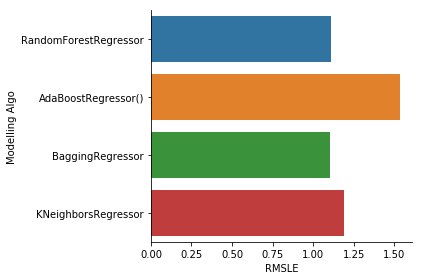

In [90]:
sns.factorplot(y="Modelling Algo", x="RMSLE", data=rmsle_frame, aspect=1.5, kind="bar")

In [91]:
no_of_test = [500]
params_dict = {'n_estimators':no_of_test, 'n_jobs':[-1], 'max_features':['auto', 'sqrt', 'log2']}
clf_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='neg_mean_squared_log_error')
clf_rfr.fit(x_train,y_train)
pred = clf_rfr.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

/Users/rahulsharma/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


1.1072686395846338


In [92]:
pred=clf_rfr.predict(df_test.drop({'Complaint-ID', 'Consumer-complaint-summary'}, axis=1))
d={'Complaint-ID':df_test['Complaint-ID'],'Days-Needed':pred, 'Date-received':test['Date-received']}
ans=pd.DataFrame(d)

In [93]:
ans['Round-int'] = ans['Days-Needed'].astype(int)

In [94]:
ans['Days-Needed'] = ans['Round-int']

In [95]:
ans.drop({'Round-int'},axis=1,inplace=True)

In [96]:
ans.head()

,Complaint-ID,Date-received,Days-Needed
0,Te-1,8/18/2016,0
1,Te-2,4/18/2016,8
2,Te-3,3/23/2016,1
3,Te-4,6/26/2017,2
4,Te-5,5/13/2016,0


In [97]:
from datetime import datetime, timedelta

In [98]:
tran_array

array(['Debt collection', 'Mortgage', 'Credit card', 'Credit reporting',
       'Consumer Loan', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Student loan', 'Bank account or service', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan',
       'Money transfer, virtual currency, or money service',
       'Prepaid card', 'Payday loan', 'Checking or savings account',
       'Other financial service', 'Money transfers', 'Virtual currency'],
      dtype=object)

In [99]:
tran_array_map = {'Debt collection':11, 'Mortgage':12, 'Credit card':13, 'Credit reporting':14,
       'Consumer Loan':15, 'Credit card or prepaid card':16,
       'Credit reporting, credit repair services, or other personal consumer reports':17,
       'Student loan':18, 'Bank account or service':19, 'Vehicle loan or lease':20,
       'Payday loan, title loan, or personal loan':21,
       'Money transfer, virtual currency, or money service':22,
       'Prepaid card':23, 'Payday loan':24, 'Checking or savings account':25,
       'Other financial service':26, 'Money transfers':27, 'Virtual currency':28}

In [100]:
ans['Transaction-type'] = df_test['Transaction-Type']

In [102]:
ans.head()

,Complaint-ID,Date-received,Days-Needed,Transaction-type
0,Te-1,8/18/2016,0,0
1,Te-2,4/18/2016,8,7
2,Te-3,3/23/2016,1,5
3,Te-4,6/26/2017,2,15
4,Te-5,5/13/2016,0,5


In [103]:
inv_map = {v: k for k, v in tran_array_map.iteritems()}

In [104]:
inv_map

{11: 'Debt collection',
 12: 'Mortgage',
 13: 'Credit card',
 14: 'Credit reporting',
 15: 'Consumer Loan',
 16: 'Credit card or prepaid card',
 17: 'Credit reporting, credit repair services, or other personal consumer reports',
 18: 'Student loan',
 19: 'Bank account or service',
 20: 'Vehicle loan or lease',
 21: 'Payday loan, title loan, or personal loan',
 22: 'Money transfer, virtual currency, or money service',
 23: 'Prepaid card',
 24: 'Payday loan',
 25: 'Checking or savings account',
 26: 'Other financial service',
 27: 'Money transfers',
 28: 'Virtual currency'}

In [105]:
ans['Transaction-type'] = test['Transaction-Type']

In [106]:
ans['Transaction-time'] = test['Transaction-Type']

In [107]:
ans['Transaction-time'] = ans['Transaction-time'].map(tran_array_map)

In [108]:
ans.head()

,Complaint-ID,Date-received,Days-Needed,Transaction-type,Transaction-time
0,Te-1,8/18/2016,0,Bank account or service,19
1,Te-2,4/18/2016,8,Debt collection,11
2,Te-3,3/23/2016,1,Credit reporting,14
3,Te-4,6/26/2017,2,Student loan,18
4,Te-5,5/13/2016,0,Credit reporting,14


In [109]:
ans.to_csv('Complaint--Status--Tracking--New.csv',index=False)

In [ ]:
for i in range(0,len(ans)):
    x = ans['Date-received'][i]
    x_datetime = dt.strptime(str(x), "%m/%d/%Y")
    ti = ans['Days-Needed'][i] + ans['Transaction-time'][i]
    new_datetime = x_datetime + td(days=ti)
    x2 = new_datetime.strftime("%d/%m/%Y")
    ans['Finish-Date'][i] = x2    

/Users/rahulsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [3]:
ans_final.head()

,Unnamed: 0,Complaint-ID,Date-received,Days-Needed,Transaction-type,Transaction-time,Finish-Date
0,0,Te-1,8/18/2016,0,Bank account or service,19,06/09/2016
1,1,Te-2,4/18/2016,8,Debt collection,11,07/05/2016
2,2,Te-3,3/23/2016,1,Credit reporting,14,07/04/2016
3,3,Te-4,6/26/2017,2,Student loan,18,16/07/2017
4,4,Te-5,5/13/2016,0,Credit reporting,14,27/05/2016
